# Methylation heatmaps

Renders heatmaps for figures 2, 3 and supplementary figures

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
annotations = pd.read_csv(os.path.join("SD-2151_191218_IDAT","annotation.pnet"))

In [3]:
annotations

,Sample_Name,Sample_Name2,Sample_Well,Sample_Plate,Sample_Group,Pool_ID,patient,sex,type,Array,Slide,Type
0,320,P1a,NaN,NaN,NaN,NaN,PanNET_04,M,PanNET,R03C01,203922140031,Primary
1,2580,P1b,NaN,NaN,NaN,NaN,PanNET_04,M,PanNET,R02C01,203922140056,Primary
2,2584,M1a,NaN,NaN,NaN,NaN,PanNET_04,M,PanNET,R03C01,203922140056,Metastasis
3,2586,M1b,NaN,NaN,NaN,NaN,PanNET_04,M,PanNET,R01C01,203922140031,Metastasis
4,2597,M2a,NaN,NaN,NaN,NaN,PanNET_04,M,PanNET,R04C01,203922140056,Metastasis
5,2600,M2b,NaN,NaN,NaN,NaN,PanNET_04,M,PanNET,R02C01,203922140031,Metastasis
6,5288,P1a,NaN,NaN,NaN,NaN,PanNET_01,F,PanNET,R01C01,203922140033,Primary
7,5292,P1b,NaN,NaN,NaN,NaN,PanNET_01,F,PanNET,R02C01,203922140033,Primary
8,5621,P1a,NaN,NaN,NaN,NaN,PanNET_03,M,PanNET,R05C01,203922140031,Primary
9,6680,M3,NaN,NaN,NaN,NaN,PanNET_04,M,PanNET,R06C01,203922140056,Metastasis


In [4]:
data = pd.read_table("beta_values_pnet.txt")

In [5]:
data=data.dropna().transpose()

In [6]:
names = {}
for i in range(28):
    names[str(annotations["Slide"][i])+"_"+str(annotations["Array"][i])] = str(annotations["patient"][i])+"_"+str(annotations["Sample_Name2"][i])
data=data.rename(names)

In [7]:
data

,cg14817997,cg26928153,cg16269199,cg13869341,cg14008030,cg12045430,cg20826792,cg20253340,cg02404219,cg21870274,...,cg03930849,cg17939569,cg13365400,cg02600718,cg21106100,cg08265308,cg10488260,cg09748881,cg07587934,cg16855331
PanNET_04_P1a,0.446341,0.797142,0.667082,0.781863,0.504230,0.158684,0.192964,0.522277,0.851602,0.631093,...,0.551694,0.662861,0.708151,0.050207,0.806216,0.896300,0.269304,0.996137,0.692749,0.178275
PanNET_04_P1b,0.756522,0.875430,0.734373,0.834511,0.476906,0.160701,0.199487,0.484805,0.887376,0.521645,...,0.520651,0.655707,0.750408,0.000000,0.846332,0.917312,0.342129,0.846472,0.738777,0.190076
PanNET_04_M1a,0.400606,0.804008,0.620010,0.753769,0.486357,0.143698,0.166384,0.600335,0.883549,0.662451,...,0.478474,0.657465,0.663342,0.071585,0.784679,0.831989,0.445398,0.848567,0.700966,0.160470
PanNET_04_M1b,0.500343,0.826548,0.695863,0.770619,0.520794,0.147804,0.171646,0.551515,0.894311,0.660299,...,0.451754,0.644544,0.768879,0.075095,0.782271,0.900931,0.361863,0.818518,0.687580,0.191864
PanNET_04_M2a,0.702866,0.888456,0.715518,0.823891,0.472373,0.179493,0.183299,0.412923,0.883830,0.498255,...,0.455261,0.675544,0.567273,0.032846,0.778373,0.902839,0.245459,0.821018,0.680858,0.170620
PanNET_04_M2b,0.744467,0.893784,0.726086,0.823917,0.486519,0.180181,0.228228,0.439236,0.867134,0.513415,...,0.482884,0.754622,0.751750,0.050336,0.676532,0.714016,0.227042,0.760233,0.642121,0.154487
PanNET_01_P1a,0.646819,0.922021,0.762010,0.795330,0.619119,0.168635,0.178071,0.378475,0.612777,0.579564,...,0.378833,0.263061,0.450000,0.034650,0.099530,0.252841,0.056371,0.452816,0.596862,0.224790
PanNET_01_P1b,0.666132,0.918634,0.748542,0.801589,0.618807,0.164982,0.207190,0.406181,0.804984,0.589880,...,0.507576,0.338047,0.288003,0.064369,0.301281,0.033233,0.032566,0.339805,0.611324,0.268091
PanNET_03_P1a,0.604467,0.890540,0.715197,0.795187,0.524580,0.112219,0.188644,0.571226,0.897994,0.859107,...,0.509755,0.782994,0.600488,0.108283,0.830011,0.856276,1.000000,0.827279,0.564117,0.178163
PanNET_04_M3,0.690107,0.904210,0.710913,0.826791,0.495535,0.151713,0.204375,0.467672,0.904320,0.627564,...,0.494815,0.648890,0.699083,0.113693,0.818593,0.890414,0.303165,0.862074,0.635682,0.181361


In [8]:
#Remove Lynch case
data = data.drop(["7_Lynch"])

In [9]:
data

,cg14817997,cg26928153,cg16269199,cg13869341,cg14008030,cg12045430,cg20826792,cg20253340,cg02404219,cg21870274,...,cg03930849,cg17939569,cg13365400,cg02600718,cg21106100,cg08265308,cg10488260,cg09748881,cg07587934,cg16855331
PanNET_04_P1a,0.446341,0.797142,0.667082,0.781863,0.504230,0.158684,0.192964,0.522277,0.851602,0.631093,...,0.551694,0.662861,0.708151,0.050207,0.806216,0.896300,0.269304,0.996137,0.692749,0.178275
PanNET_04_P1b,0.756522,0.875430,0.734373,0.834511,0.476906,0.160701,0.199487,0.484805,0.887376,0.521645,...,0.520651,0.655707,0.750408,0.000000,0.846332,0.917312,0.342129,0.846472,0.738777,0.190076
PanNET_04_M1a,0.400606,0.804008,0.620010,0.753769,0.486357,0.143698,0.166384,0.600335,0.883549,0.662451,...,0.478474,0.657465,0.663342,0.071585,0.784679,0.831989,0.445398,0.848567,0.700966,0.160470
PanNET_04_M1b,0.500343,0.826548,0.695863,0.770619,0.520794,0.147804,0.171646,0.551515,0.894311,0.660299,...,0.451754,0.644544,0.768879,0.075095,0.782271,0.900931,0.361863,0.818518,0.687580,0.191864
PanNET_04_M2a,0.702866,0.888456,0.715518,0.823891,0.472373,0.179493,0.183299,0.412923,0.883830,0.498255,...,0.455261,0.675544,0.567273,0.032846,0.778373,0.902839,0.245459,0.821018,0.680858,0.170620
PanNET_04_M2b,0.744467,0.893784,0.726086,0.823917,0.486519,0.180181,0.228228,0.439236,0.867134,0.513415,...,0.482884,0.754622,0.751750,0.050336,0.676532,0.714016,0.227042,0.760233,0.642121,0.154487
PanNET_01_P1a,0.646819,0.922021,0.762010,0.795330,0.619119,0.168635,0.178071,0.378475,0.612777,0.579564,...,0.378833,0.263061,0.450000,0.034650,0.099530,0.252841,0.056371,0.452816,0.596862,0.224790
PanNET_01_P1b,0.666132,0.918634,0.748542,0.801589,0.618807,0.164982,0.207190,0.406181,0.804984,0.589880,...,0.507576,0.338047,0.288003,0.064369,0.301281,0.033233,0.032566,0.339805,0.611324,0.268091
PanNET_03_P1a,0.604467,0.890540,0.715197,0.795187,0.524580,0.112219,0.188644,0.571226,0.897994,0.859107,...,0.509755,0.782994,0.600488,0.108283,0.830011,0.856276,1.000000,0.827279,0.564117,0.178163
PanNET_04_M3,0.690107,0.904210,0.710913,0.826791,0.495535,0.151713,0.204375,0.467672,0.904320,0.627564,...,0.494815,0.648890,0.699083,0.113693,0.818593,0.890414,0.303165,0.862074,0.635682,0.181361


In [10]:
stds = []
n=0
for i in data.keys():
    n += 1
    if n%100000 == 0:
        print(100*float(n)/864025, "percent done")
    stds.append((i, np.std(data[i])))

11.573739185787447 percent done
23.147478371574895 percent done
34.721217557362344 percent done
46.29495674314979 percent done
57.86869592893724 percent done
69.44243511472469 percent done
81.01617430051213 percent done
92.58991348629958 percent done


In [11]:
stds = sorted(stds, reverse=True, key = lambda x: x[1])

In [12]:
heatmap_probes = [x[0] for x in stds[:8640]]

In [13]:
heatmap_dataframe = data[heatmap_probes]
heatmap_dataframe

,cg08146708,cg14942092,cg06688803,cg03324099,cg10584449,cg15561493,cg23656963,cg08991255,cg20462978,cg08320316,...,cg15400074,cg08118241,cg07025886,cg10817951,cg20390814,cg01409343,cg13634870,cg16202259,cg03218402,cg20584239
PanNET_04_P1a,0.047741,0.027526,0.039048,0.023858,0.029850,0.860924,0.956585,0.948772,0.924780,0.920670,...,0.942708,0.110699,0.587891,0.260307,0.848176,0.743899,0.780131,0.513287,0.933458,0.871384
PanNET_04_P1b,0.054821,0.038088,0.008860,0.026815,0.033650,0.909374,0.965492,0.935923,0.917357,0.954660,...,0.995596,0.126246,0.542757,0.320292,0.629618,0.695230,0.727325,0.491679,0.933599,0.912703
PanNET_04_M1a,0.043175,0.041026,0.026248,0.041648,0.031127,0.926804,0.954410,0.959954,0.939828,0.944892,...,0.863294,0.159945,0.609417,0.251099,0.799935,0.720299,0.738139,0.508664,0.960255,0.900063
PanNET_04_M1b,0.028771,0.047484,0.032907,0.031971,0.034186,0.909204,0.962850,0.951924,0.904541,0.918307,...,0.935664,0.155404,0.444377,0.277128,0.728411,0.722674,0.809622,0.557659,0.931998,0.939116
PanNET_04_M2a,0.046603,0.037687,0.030510,0.042476,0.045415,0.916142,0.955163,0.966065,0.929206,0.850255,...,0.670379,0.131132,0.504000,0.398963,0.560650,0.656752,0.754626,0.337079,0.934091,0.922669
PanNET_04_M2b,0.042968,0.033129,0.027034,0.041050,0.047470,0.916482,0.959203,0.975409,0.918030,0.912812,...,0.610346,0.172165,0.433637,0.334815,0.538986,0.757466,0.755949,0.469371,0.941989,0.922660
PanNET_01_P1a,0.923693,0.936658,0.918599,0.000000,0.885958,0.252127,0.815287,0.959890,0.897991,0.933499,...,0.490604,0.100575,0.907568,0.528949,0.444238,0.173342,0.803484,0.813020,0.638559,0.313761
PanNET_01_P1b,0.937229,0.948342,0.937825,0.637990,0.913272,0.432673,0.872574,0.938947,0.912937,0.930095,...,0.481466,0.125660,0.830093,0.544794,0.490376,0.183947,0.729092,0.830066,0.592943,0.373114
PanNET_03_P1a,0.958562,0.950936,0.043378,0.924613,0.900263,0.169895,0.030291,0.018157,0.046778,0.009899,...,0.405983,0.234314,0.167889,0.881669,0.332159,0.750870,0.119974,0.055313,0.986079,0.819576
PanNET_04_M3,0.037915,0.043364,0.009821,0.033512,0.035119,0.874794,0.934014,0.900928,0.912589,0.884755,...,0.875271,0.131987,0.512269,0.474219,0.805545,0.705242,0.803883,0.290237,0.946224,0.816694


In [14]:
import matplotlib.colors
import scipy

norm = matplotlib.colors.Normalize(0,1)
colors = [[norm(0), "darkblue"],
          [norm( 1.0), "yellow"]]

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)


In [15]:
sample_cols = {}
for i in list(heatmap_dataframe.index):
    sample_col = ""
    met_col = ""
    if "PanNET_01" in i:
        sample_col = "red"
    elif "PanNET_02" in i:
        sample_col = "blue"
    elif "PanNET_03" in i:
        sample_col = "green"
    elif "PanNET_04" in i:
        sample_col = "yellow"
    if "P" in i.split("_")[-1]:
        met_col = "white"
    else:
        met_col = "black"
    
    sample_cols[i] = [sample_col, met_col]

sample_cols = pd.DataFrame(sample_cols).transpose()

/Users/samuel/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


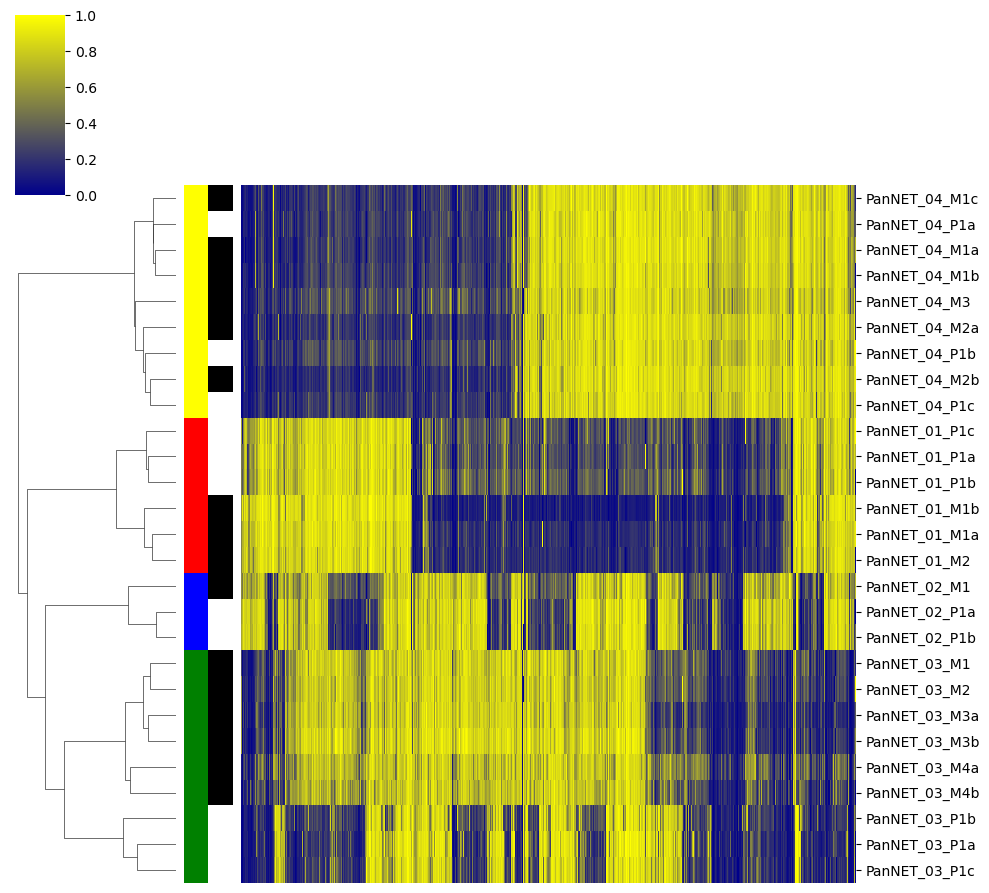

In [16]:
hmap = sns.clustermap(heatmap_dataframe, row_colors = sample_cols, cmap=cmap)

hmap.ax_col_dendrogram.set_visible(False)
hmap.ax_heatmap.get_xaxis().set_visible(False)
#hmap.ax_heatmap.get_yaxis().set_visible(False)
hmap.ax_row_colors.get_xaxis().set_visible(False)

hmap
plt.savefig("Heatmap_PanNET_methylation.png", dpi=300)

# Individual patient heatmaps

In [17]:
pat = "PanNET_01"
include_samples = []
for i in data.index:
    if i.startswith(pat):
        include_samples.append(i)
data_divided = data.loc[include_samples]
newnames = {}
for i in data_divided.index:
    newnames[i] = i.split("_")[-1]
data_divided.rename(index= newnames, inplace=True)


data_divided

,cg14817997,cg26928153,cg16269199,cg13869341,cg14008030,cg12045430,cg20826792,cg20253340,cg02404219,cg21870274,...,cg03930849,cg17939569,cg13365400,cg02600718,cg21106100,cg08265308,cg10488260,cg09748881,cg07587934,cg16855331
P1a,0.646819,0.922021,0.762010,0.795330,0.619119,0.168635,0.178071,0.378475,0.612777,0.579564,...,0.378833,0.263061,0.450000,0.034650,0.099530,0.252841,0.056371,0.452816,0.596862,0.224790
P1b,0.666132,0.918634,0.748542,0.801589,0.618807,0.164982,0.207190,0.406181,0.804984,0.589880,...,0.507576,0.338047,0.288003,0.064369,0.301281,0.033233,0.032566,0.339805,0.611324,0.268091
M1a,0.588310,0.923998,0.756804,0.785617,0.597591,0.186100,0.175906,0.296194,0.514206,0.539999,...,0.376432,0.189130,0.000000,0.196266,0.632993,0.224599,0.078994,0.262706,0.526021,0.162470
M1b,0.471117,0.905305,0.723095,0.785112,0.587588,0.205680,0.175715,0.285092,0.408813,0.612682,...,0.489892,0.000000,0.401748,0.108710,0.197179,0.060453,0.055383,0.437080,0.520929,0.111555
M2,0.592299,0.925399,0.731775,0.785266,0.588280,0.182279,0.164767,0.206734,0.406967,0.613712,...,0.475223,0.708281,0.767403,0.105829,0.273657,0.211731,0.046395,0.317543,0.503382,0.159827
P1c,0.570077,0.928466,0.741378,0.798196,0.606210,0.154603,0.157166,0.366896,0.770961,0.592453,...,0.391692,0.000000,0.540465,0.000000,0.211086,0.341945,0.061635,0.504948,0.546950,0.196476


In [18]:
stds = []
n=0
for i in data_divided.keys():
    n += 1
    if n%100000 == 0:
        print(100*float(n)/864060, "percent done")
    stds.append((i, np.std(data_divided[i])))

11.573270374742494 percent done
23.146540749484988 percent done
34.71981112422748 percent done
46.293081498969975 percent done
57.866351873712475 percent done
69.43962224845497 percent done
81.01289262319746 percent done
92.58616299793995 percent done


In [19]:
stds = sorted(stds, reverse=True, key = lambda x: x[1])

/Users/samuel/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


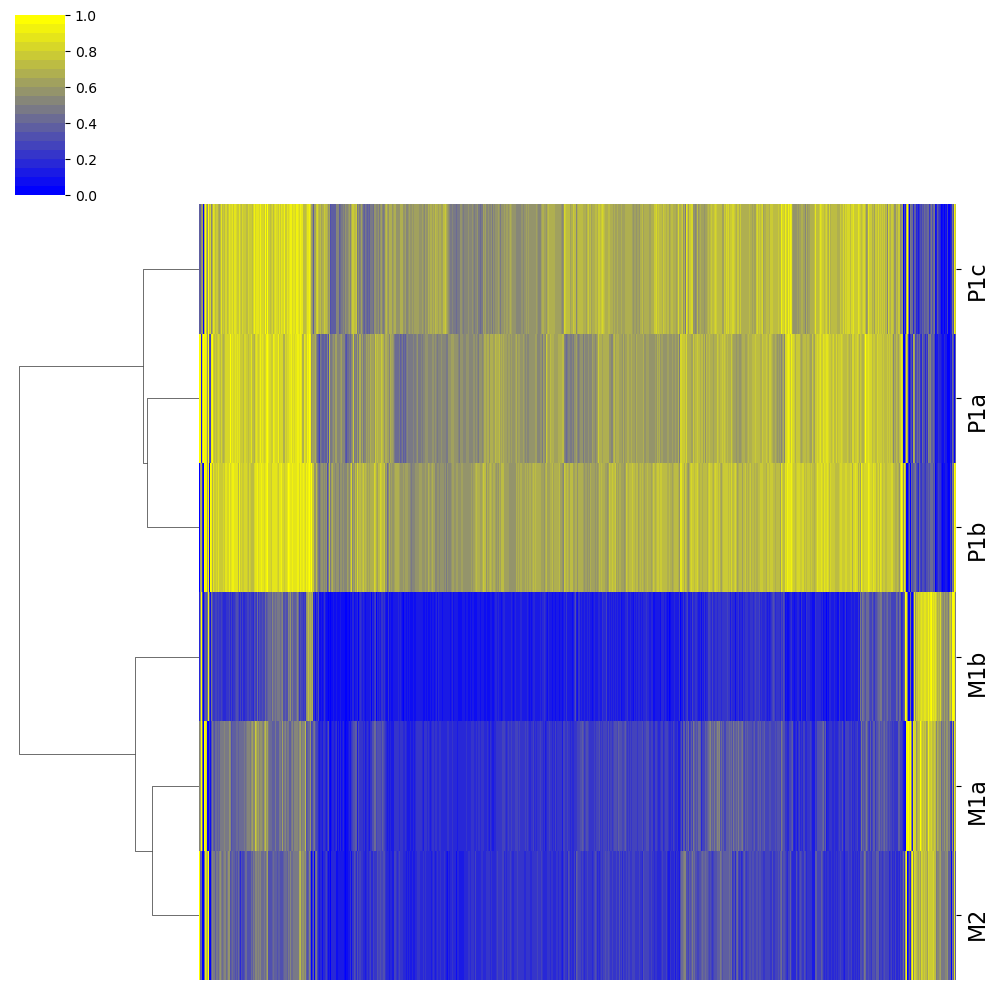

In [20]:
heatmap_probes = [x[0] for x in stds[:10000]]
heatmap_dataframe = data_divided[heatmap_probes]
f=sns.clustermap(heatmap_dataframe, cmap=sns.blend_palette(['blue', 'yellow'],20), xticklabels=False)
f.ax_col_dendrogram.set_visible(False)
f.ax_heatmap.set_yticklabels(f.ax_heatmap.get_ymajorticklabels(), fontsize = 16)
f
plt.savefig("PanNET_01_methylation_heatmap.png", dpi=300)

11.573270374742494 percent done
23.146540749484988 percent done
34.71981112422748 percent done
46.293081498969975 percent done
57.866351873712475 percent done
69.43962224845497 percent done
81.01289262319746 percent done
92.58616299793995 percent done


/Users/samuel/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


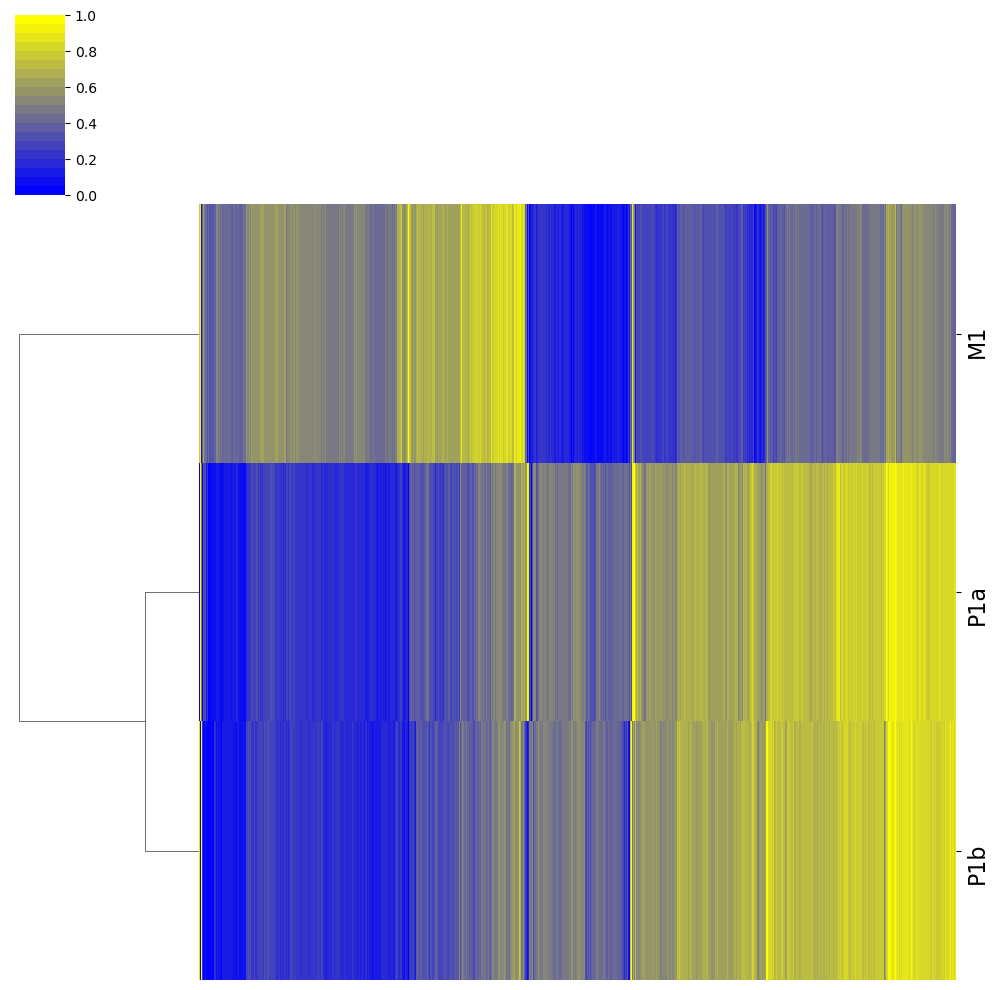

In [21]:
pat = "PanNET_02"
include_samples = []
for i in data.index:
    if i.startswith(pat):
        include_samples.append(i)
data_divided = data.loc[include_samples]
newnames = {}
for i in data_divided.index:
    newnames[i] = i.split("_")[-1]
data_divided.rename(index= newnames, inplace=True)


stds = []
n=0
for i in data_divided.keys():
    n += 1
    if n%100000 == 0:
        print(100*float(n)/864060, "percent done")
    stds.append((i, np.std(data_divided[i])))
stds = sorted(stds, reverse=True, key = lambda x: x[1])
heatmap_probes = [x[0] for x in stds[:10000]]
heatmap_dataframe = data_divided[heatmap_probes]
f=sns.clustermap(heatmap_dataframe, cmap=sns.blend_palette(['blue', 'yellow'],20), xticklabels=False)
f.ax_col_dendrogram.set_visible(False)
f.ax_heatmap.set_yticklabels(f.ax_heatmap.get_ymajorticklabels(), fontsize = 16)
f
plt.savefig("PanNET_02_methylation_heatmap.png", dpi=300)

11.573270374742494 percent done
23.146540749484988 percent done
34.71981112422748 percent done
46.293081498969975 percent done
57.866351873712475 percent done
69.43962224845497 percent done
81.01289262319746 percent done
92.58616299793995 percent done


/Users/samuel/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


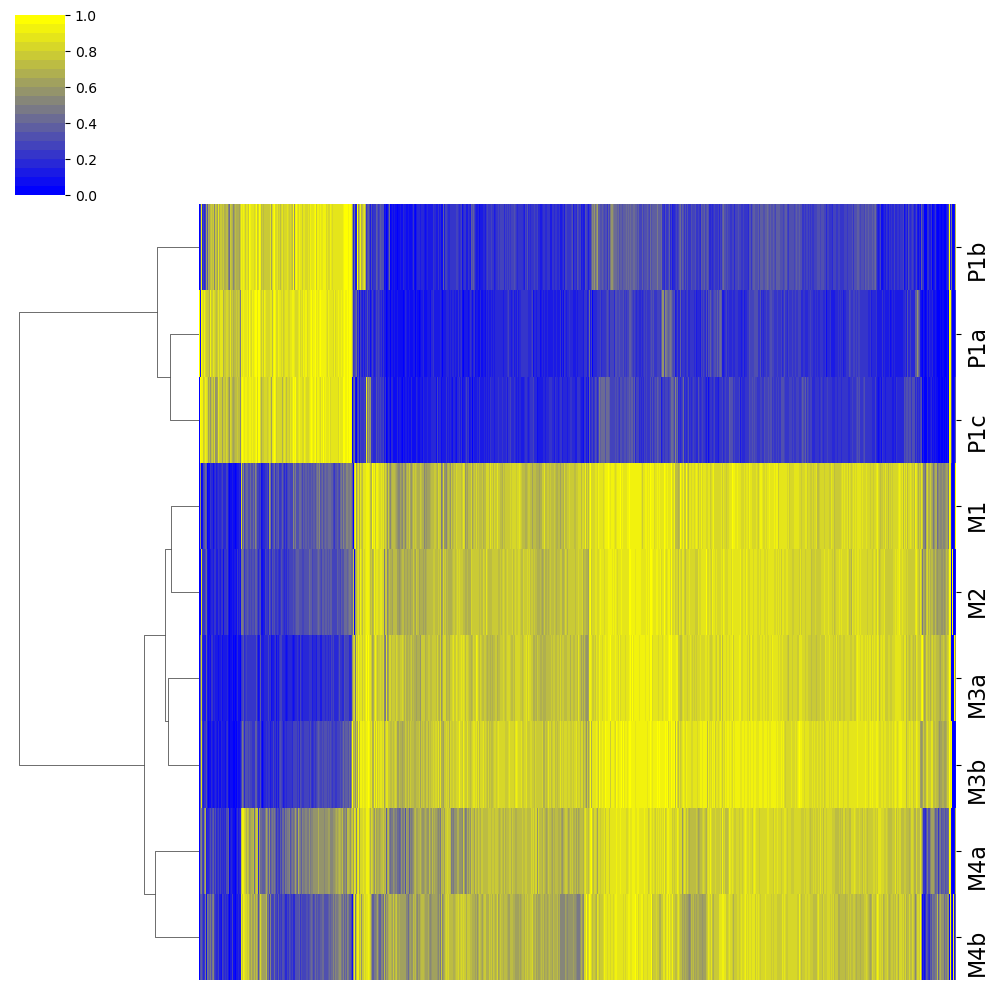

In [22]:
pat = "PanNET_03"
include_samples = []
for i in data.index:
    if i.startswith(pat):
        include_samples.append(i)
data_divided = data.loc[include_samples]
newnames = {}
for i in data_divided.index:
    newnames[i] = i.split("_")[-1]
data_divided.rename(index= newnames, inplace=True)


stds = []
n=0
for i in data_divided.keys():
    n += 1
    if n%100000 == 0:
        print(100*float(n)/864060, "percent done")
    stds.append((i, np.std(data_divided[i])))
stds = sorted(stds, reverse=True, key = lambda x: x[1])
heatmap_probes = [x[0] for x in stds[:10000]]
heatmap_dataframe = data_divided[heatmap_probes]
f=sns.clustermap(heatmap_dataframe, cmap=sns.blend_palette(['blue', 'yellow'],20), xticklabels=False)
f.ax_col_dendrogram.set_visible(False)
f.ax_heatmap.set_yticklabels(f.ax_heatmap.get_ymajorticklabels(), fontsize = 16)
f
plt.savefig("PanNET_03_methylation_heatmap.png", dpi=300)

11.573270374742494 percent done
23.146540749484988 percent done
34.71981112422748 percent done
46.293081498969975 percent done
57.866351873712475 percent done
69.43962224845497 percent done
81.01289262319746 percent done
92.58616299793995 percent done


/Users/samuel/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


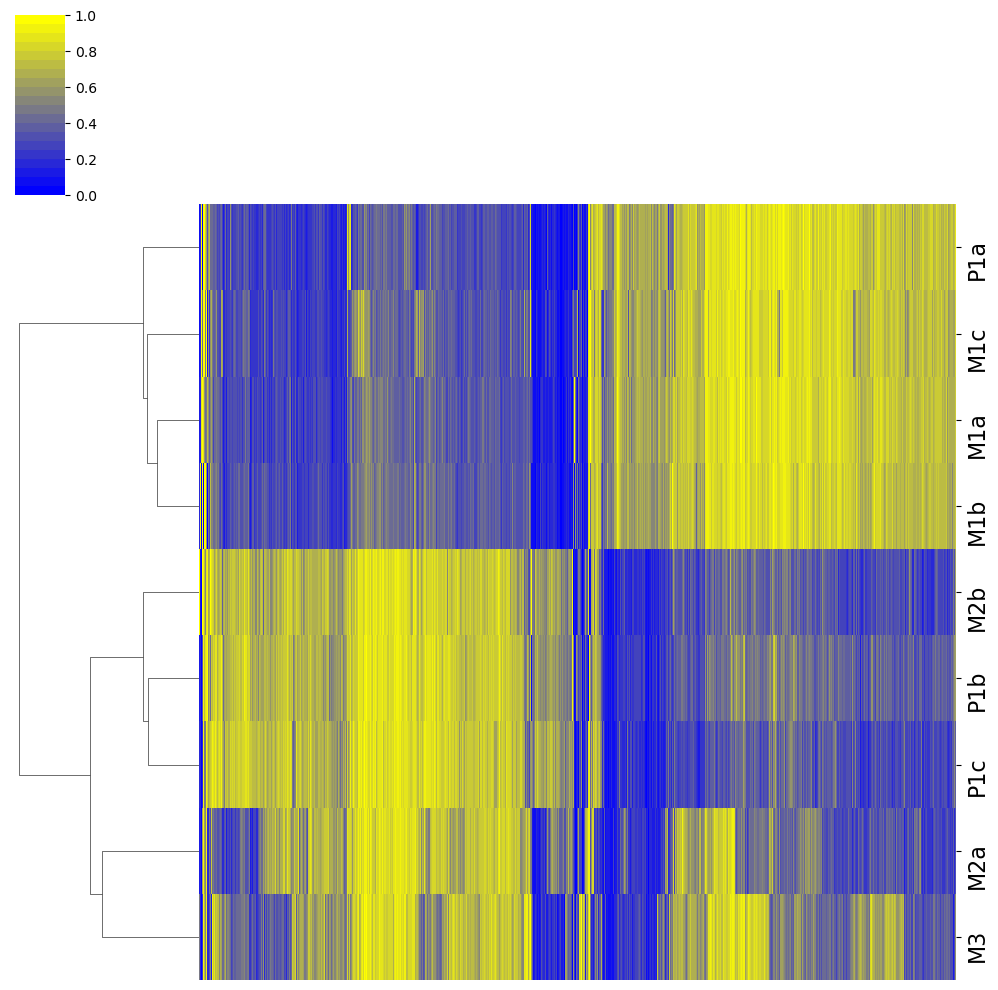

In [23]:
pat = "PanNET_04"
include_samples = []
for i in data.index:
    if i.startswith(pat):
        include_samples.append(i)
data_divided = data.loc[include_samples]
newnames = {}
for i in data_divided.index:
    newnames[i] = i.split("_")[-1]
data_divided.rename(index= newnames, inplace=True)


stds = []
n=0
for i in data_divided.keys():
    n += 1
    if n%100000 == 0:
        print(100*float(n)/864060, "percent done")
    stds.append((i, np.std(data_divided[i])))
stds = sorted(stds, reverse=True, key = lambda x: x[1])
heatmap_probes = [x[0] for x in stds[:10000]]
heatmap_dataframe = data_divided[heatmap_probes]
f=sns.clustermap(heatmap_dataframe, cmap=sns.blend_palette(['blue', 'yellow'],20), xticklabels=False)
f.ax_col_dendrogram.set_visible(False)
f.ax_heatmap.set_yticklabels(f.ax_heatmap.get_ymajorticklabels(), fontsize = 16)
f
plt.savefig("PanNET_04_methylation_heatmap.png", dpi=300)